In [4]:
from google.colab import files
uploaded=files.upload()

Saving netflix_customer_churn.csv to netflix_customer_churn.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [6]:
df=pd.read_csv('netflix_customer_churn.csv')
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [7]:
df.shape

(5000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

,0
customer_id,5000
age,53
gender,3
subscription_type,3
watch_hours,2343
last_login_days,61
region,6
device,5
monthly_fee,3
churned,2


In [11]:
df=df.drop(columns=['customer_id'],axis=1)

In [12]:
df['gender'].value_counts()

,count
gender,
Female,1711
Male,1654
Other,1635


In [13]:
df['subscription_type'].value_counts()

,count
subscription_type,
Premium,1693
Basic,1661
Standard,1646


In [14]:
df['region'].value_counts()

,count
region,
South America,873
Europe,867
North America,851
Asia,841
Africa,803
Oceania,765


In [15]:
df['device'].value_counts()

,count
device,
Tablet,1048
Laptop,1006
Mobile,1004
TV,993
Desktop,949


In [16]:
df['monthly_fee'].value_counts()

,count
monthly_fee,
17.99,1693
8.99,1661
13.99,1646


In [17]:
df['churned'].value_counts()

,count
churned,
1,2515
0,2485


In [18]:
df['payment_method'].value_counts()

,count
payment_method,
Debit Card,1030
PayPal,1026
Crypto,995
Gift Card,976
Credit Card,973


In [19]:
df['number_of_profiles'].value_counts()

,count
number_of_profiles,
5,1034
2,1001
4,999
3,994
1,972


In [20]:
df['favorite_genre'].value_counts()

,count
favorite_genre,
Drama,731
Documentary,729
Romance,725
Sci-Fi,720
Horror,713
Action,697
Comedy,685


In [21]:
encoder=OneHotEncoder(drop=None,sparse_output=False)
encoded_df=encoder.fit_transform(df[['gender','region','favorite_genre','payment_method','device','subscription_type','favorite_genre']])
encoded_df=pd.DataFrame(encoded_df,columns=encoder.get_feature_names_out())

In [22]:
encoded_df=pd.DataFrame(encoded_df,columns=encoder.get_feature_names_out())

In [23]:
encoded_df.head(10)

,gender_Female,gender_Male,gender_Other,region_Africa,region_Asia,region_Europe,region_North America,region_Oceania,region_South America,favorite_genre_Action,...,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
col=['gender','region','favorite_genre','payment_method','device','subscription_type','favorite_genre']
df=pd.concat([df.drop(columns=col),encoded_df],axis=1)

In [25]:
df.head()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,gender_Female,gender_Male,gender_Other,...,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,51,14.73,29,8.99,1,1,0.49,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47,0.70,19,13.99,1,5,0.03,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,27,16.32,10,13.99,0,2,1.48,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,53,4.51,12,17.99,1,2,0.35,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56,1.89,13,13.99,1,2,0.13,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
x=df.drop(columns=['churned'],axis=-1)
y=df['churned']

In [27]:
xtrain, xtest,ytrain, ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
xtrain

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day,gender_Female,gender_Male,gender_Other,region_Africa,...,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
4227,54,9.80,56,17.99,4,0.17,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4676,31,10.38,42,8.99,1,0.24,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
800,59,20.13,6,8.99,1,2.88,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3671,45,9.77,16,8.99,2,0.57,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4193,36,9.10,2,13.99,2,3.03,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,41,1.20,49,13.99,4,0.02,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
466,32,24.87,41,17.99,5,0.59,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3092,18,3.54,45,13.99,5,0.08,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3772,50,7.96,51,17.99,5,0.15,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
ytrain

,churned
4227,1
4676,1
800,0
3671,0
4193,0
...,...
4426,1
466,0
3092,1
3772,1


In [30]:
xtest

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day,gender_Female,gender_Male,gender_Other,region_Africa,...,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
1501,39,9.96,22,8.99,5,0.43,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2586,18,0.25,37,13.99,5,0.01,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2653,19,8.54,6,13.99,3,1.22,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1055,34,13.49,51,17.99,1,0.26,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
705,29,24.18,59,8.99,1,0.40,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,18,12.22,48,17.99,5,0.25,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2313,33,1.32,36,13.99,1,0.04,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3214,42,9.19,5,17.99,5,1.53,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2732,22,29.96,43,8.99,5,0.68,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
ytest

,churned
1501,0
2586,1
2653,0
1055,1
705,1
...,...
4711,0
2313,1
3214,0
2732,0


In [32]:
xtrain.shape

(4000, 42)

In [33]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [34]:
xtrain

array([[ 0.64767647, -0.15948307,  1.48011461, ..., -0.40890296,
         2.39932423, -0.41264393],
       [-0.83830161, -0.11177607,  0.68172496, ..., -0.40890296,
        -0.41678402, -0.41264393],
       [ 0.97071518,  0.69019511, -1.37127699, ..., -0.40890296,
        -0.41678402, -0.41264393],
       ...,
       [-1.67820226, -0.67438969,  0.85280846, ...,  2.44556799,
        -0.41678402, -0.41264393],
       [ 0.3892455 , -0.31082943,  1.19497545, ...,  2.44556799,
        -0.41678402, -0.41264393],
       [-0.96751709, -0.20719008, -1.37127699, ..., -0.40890296,
        -0.41678402, -0.41264393]])

In [35]:
model=Sequential()
model.add(Dense(42,activation='relu',input_dim=xtrain.shape[1]))
model.add(Dense(42,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 42)             │         1,806 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 42)             │         1,806 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           516 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,141 (16.18 KB)

 Trainable params: 4,141 (16.18 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
history=model.fit(xtrain,ytrain,epochs=100,validation_split=0.2)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5592 - loss: 0.6762 - val_accuracy: 0.8037 - val_loss: 0.4731
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8370 - loss: 0.3838 - val_accuracy: 0.8575 - val_loss: 0.3079
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8953 - loss: 0.2405 - val_accuracy: 0.8788 - val_loss: 0.2913
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9039 - loss: 0.2140 - val_accuracy: 0.8725 - val_loss: 0.3111
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9270 - loss: 0.1780 - val_accuracy: 0.8775 - val_loss: 0.3016
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9195 - loss: 0.1774 - val_accuracy: 0.8825 - val_loss: 0.3038
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9294 - loss: 0.1694 - val_accuracy: 0.8775 - val_loss: 0.3159
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9219 - loss: 0.1728 - val_accu

In [39]:
model.layers[0].get_weights()

[array([[-0.43350664,  0.08932911, -0.12666379, ...,  0.24940687,
          0.42142132, -0.02931343],
        [ 0.08889807, -0.17220429, -0.3671642 , ...,  0.1592978 ,
          0.35081825, -0.68801874],
        [ 0.50576323, -0.596397  , -0.11631561, ...,  0.0762745 ,
         -0.45789564, -0.14198326],
        ...,
        [ 0.21793534,  0.01429198,  0.13988821, ..., -0.11026888,
         -0.06902524, -0.07843773],
        [-0.02211217, -0.22300217, -0.24290723, ..., -0.08487347,
         -0.01515737,  0.03973509],
        [ 0.22920781,  0.25829113,  0.01688806, ..., -0.27506053,
         -0.03039395, -0.08992033]], dtype=float32),
 array([ 0.00726554, -0.05588528,  0.02804925, -0.05494327,  0.10194373,
         0.02796265,  0.0634892 ,  0.06685752,  0.04089013, -0.04189438,
         0.13173932,  0.18255495, -0.05076775, -0.13601963, -0.09949794,
         0.05940216,  0.03943198,  0.00346488,  0.08013949,  0.13126533,
         0.10986924, -0.15356848, -0.11024092, -0.04162556, -0.083

In [40]:
y_log=model.predict(xtest)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [41]:
y_pred=np.where(y_log>0.5,1,0)

In [42]:
accuracy_score(ytest,y_pred)

0.873

In [43]:
history.history

{'accuracy': [0.6621875166893005,
  0.8459374904632568,
  0.8934375047683716,
  0.9043750166893005,
  0.9159374833106995,
  0.9137499928474426,
  0.9240624904632568,
  0.9246875047683716,
  0.9334375262260437,
  0.9356250166893005,
  0.9390624761581421,
  0.942187488079071,
  0.9437500238418579,
  0.9493749737739563,
  0.9503124952316284,
  0.9549999833106995,
  0.9549999833106995,
  0.9618750214576721,
  0.965624988079071,
  0.9621875286102295,
  0.9668750166893005,
  0.9684374928474426,
  0.9725000262260437,
  0.9759374856948853,
  0.9793750047683716,
  0.979687511920929,
  0.9784374833106995,
  0.9793750047683716,
  0.9818750023841858,
  0.9856250286102295,
  0.9856250286102295,
  0.9856250286102295,
  0.9881250262260437,
  0.9900000095367432,
  0.9912499785423279,
  0.9925000071525574,
  0.9915624856948853,
  0.995312511920929,
  0.995312511920929,
  0.9956250190734863,
  0.9943749904632568,
  0.995312511920929,
  0.9943749904632568,
  0.996874988079071,
  0.9981250166893005,
  0.9

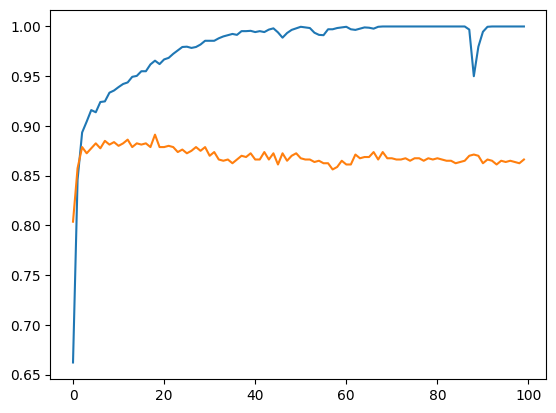

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

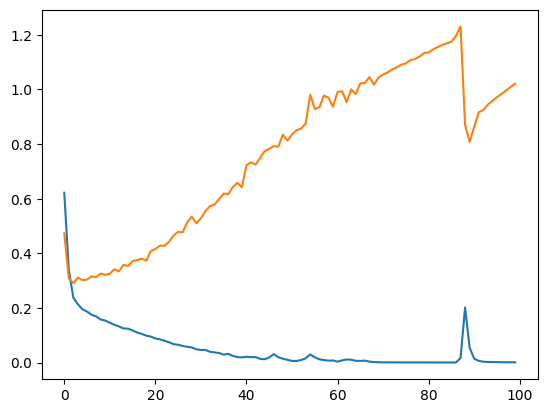

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])